# Example of modelling of growth units

In [1]:
from openalea.lpy import *
import pgljupyter
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from random import uniform
from numpy import array

In [2]:
%load_ext rpy2.ipython

# Growth 

Growth of organs is simulated using a logistic function $\frac{L}{1 + \exp{-\frac{t-tip}{b}}}$

In [ ]:
from math import exp

def growth_logistic(ttime, finalsize, tip, b):
    return finalsize / (1 + exp(-(ttime-tip)/b ))


In [20]:
%%R -o growth_logistic

growth_logistic = function(ttime, finalsize, tip, b){
    return (finalsize / (1 + exp(-(ttime-tip)/b )));
}


Definition of growth parameters for the different organs along the axis

In [21]:
%%R -i growth_logistic -o nbMetamers,maxTime,dt,LLeaf,LIn,leaf_size,internode_size
LLeaf = c(4.9, 5.5, 6., 6.9, 7.5, 8.7, 9.2, 9.6, 7.)
tipLeaf = c(0.0, 1.8, 3.7, 5.5, 7.1, 8.8, 10.4, 11.9, 13.4)
bLeaf = 1.7 

LIn = c(1., 1.2, 1.8, 2.7, 3.5, 4.2, 4.2, 3.5, 1.7)
tipIn = c(0.2, 1.9, 3.5, 5.1, 6.7, 8.4, 10.0, 11.6, 13.3)
bIn = 1.3

nbMetamers = length(LLeaf)
maxTime = 25
dt = 0.1

leaf_size = function(i, t) { return(growth_logistic(t, LLeaf[i], tipLeaf[i], bLeaf)); }
internode_size = function(i, t) { return (growth_logistic(t, LIn[i], tipIn[i], bIn)); }

Plot of final size of leaves and internodes along the main axis

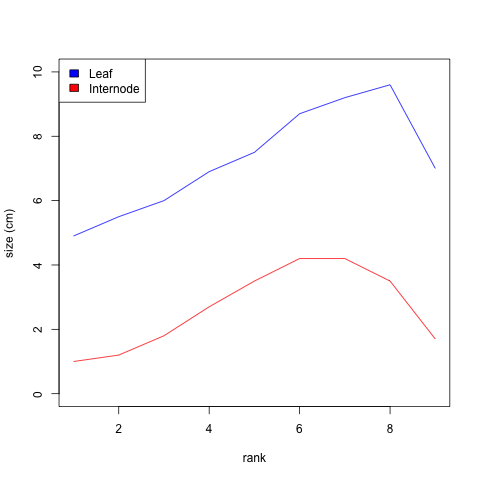

In [22]:
%%R --input LLeaf,LIn 

x = 1:length(LLeaf)
plot(x,LLeaf,ylim=c(0,10),type="l", col="blue", ylab="size (cm)", xlab='rank')
lines(x, LIn, col="red")
legend("topleft",c("Leaf","Internode"),fill=c("blue","red"))

Plot of the growth kinetics of the different leaves

In [39]:
leafsizes = array([[leaf_size(i,t)[0] for t in range(1,int(maxTime[0])+1)] for i in range(1,int(nbMetamers[0])+1)])


[1]  9 25


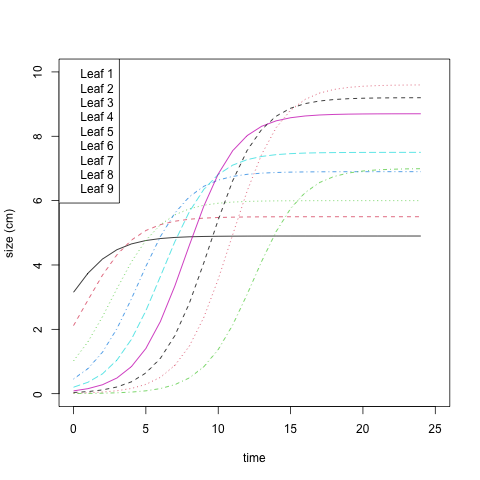

In [40]:
%%R --input maxTime,nbMetamers,leafsizes
time = 0:(maxTime-1)
print(dim(leafsizes))
plot(0,0,xlim=c(0,maxTime),ylim=c(0,10),type="l",ylab="size (cm)", xlab='time')
matlines(time, t(leafsizes), type = c("l"))
legend("topleft",paste("Leaf",1:nbMetamers))

# The Architectural model defined using Lsystem rules

Rules are based on parameters and functions defined on previous cells. 3D display is automatically displayed. Buttons allow to navigate in the different steps of the simulation.

In [46]:
%%lpy -a True -u dm -w 4 -s 600,400

Axiom: 
    nproduce _(0.3)@Gc SetColor(Material((1,15,1),10,specular=(0,0,0),shininess=0.2))
    for i in range(1,int(nbMetamers[0])+1):
        nproduce I(i,0)/(137)[[^(40)L(i,0)]]
    nproduce I(i,0) @O

derivation length: int(maxTime[0]//dt[0])
production:
I(i,t) --> I(i,t+dt)
L(i,t) --> L(i,t+dt)

interpretation:
I(i,t) :
    print(i,t,internode_size(i,t))
    F(internode_size(i,t)[0])
L(i,t) :
    l = leaf_size(i,t)[0]
    nproduce SetColor(2)_(0.1) 
    nproduce ^(t)F(l/6)[+(90)/(-30)~l(l/2)][-(90)/(30)~l(l/2)]
    nproduce F(l/6)[+(60)/(-15)~l(l/2)][-(60)/(15)~l(l/2)]F(l/6)^(20)~l(l/2)


1 0 [1] 0,4616141

2 0 [1] 0,2258786

3 0 [1] 0,1141718

4 0 [1] 0,05237048

5 0 [1] 0,02010385

6 0 [1] 0,006551802

7 0 [1] 0,001915686

8 0 [1] 0,0004664092

9 0 [1] 6,127265e-05

9 0 [1] 6,127265e-05



LsystemWidget(animate=True, derivationLength=249, is_magic=True, scene={'data': b'x\xda\xad\x99\x0bT\x14\xd7\x…

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'numpy.ndarray'>'